<a href="https://colab.research.google.com/github/jingxuanf0214/Allen-neuropixel-analysis/blob/main/Allen_LFP_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install allensdk

     |████████████████████████████████| 1.7MB 7.6MB/s 
     |████████████████████████████████| 675kB 35.2MB/s 
     |████████████████████████████████| 3.4MB 44.9MB/s 
     |████████████████████████████████| 133kB 46.4MB/s 
     |████████████████████████████████| 133kB 47.8MB/s 
     |████████████████████████████████| 10.4MB 43.2MB/s 
     |████████████████████████████████| 81kB 12.4MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 1.3MB 36.3MB/s 
     |████████████████████████████████| 102kB 14.3MB/s 
     |████████████████████████████████| 3.0MB 43.8MB/s 
     |████████████████████████████████| 153kB 58.2MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 20.1MB 253kB/s 
     |████████████████████████████████| 4.3MB 29.7MB/s 
     |████████████████████████████████| 47.4MB 93kB/s 
     |████████████████████████████████| 7.5MB 34.7MB/s 
     |████████████████████████████████| 81kB 13.1MB/s 

In [ ]:
from allensdk.core.reference_space_cache import ReferenceSpaceCache
reference_space_key = 'annotation/ccf_2017'
resolution = 25
rspc = ReferenceSpaceCache(resolution, reference_space_key, manifest='manifest.json')
# ID 1 is the adult mouse structure graph
tree = rspc.get_structure_tree(structure_graph_id=1) 

In [ ]:
#tree.get_structures_by_acronym(['LGd-sh'])
tree.get_structures_by_acronym(['LGd-co'])

[{'acronym': 'LGd-co',
  'graph_id': 1,
  'graph_order': 664,
  'id': 496345668,
  'name': 'Dorsal part of the lateral geniculate complex, core',
  'rgb_triplet': [255, 128, 132],
  'structure_id_path': [997, 8, 343, 1129, 549, 864, 1008, 170, 496345668],
  'structure_set_ids': [184527634, 691663206]}]

In [ ]:
LGd_mesh = rspc.get_structure_mesh(structure_id = 170)
LGd_mesh_sh = rspc.get_structure_mesh(structure_id = 496345664)
LGd_mesh_co = rspc.get_structure_mesh(structure_id = 496345668)
#LGd_mesh
#LGd_mesh_sh

2021-05-20 04:19:24,430 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_meshes/170.obj
2021-05-20 04:19:24,783 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_meshes/496345664.obj
2021-05-20 04:19:25,032 allensdk.api.api.retrieve_file_over_http INFO     Downloading URL: http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/annotation/ccf_2017/structure_meshes/496345668.obj


In [ ]:
LGd_mesh_vertices = LGd_mesh[0]
LGd_mesh_vertices_right = LGd_mesh_vertices[LGd_mesh_vertices[:,2]>6000]
LGd_mesh_vertices_sh = LGd_mesh_sh[0]
LGd_mesh_vertices_right_sh = LGd_mesh_vertices_sh[LGd_mesh_vertices_sh[:,2]>6000]
LGd_mesh_vertices_co = LGd_mesh_co[0]
LGd_mesh_vertices_right_co = LGd_mesh_vertices_co[LGd_mesh_vertices_co[:,2]>6000]
#np.shape(LGd_mesh_vertices)
#plt.hist(LGd_mesh_vertices[:,2])

In [ ]:
channels_B, channels_B_idx = get_lgn_channel(756781555)
channels_C, channels_C_idx = get_lgn_channel(756781557)
channels_E, channels_E_idx = get_lgn_channel(756781561)

In [ ]:
channels_C_idx

array([850144016, 850144018, 850144022, 850144024, 850144028, 850144030,
       850144034, 850144038, 850144040, 850144044, 850144046, 850144050,
       850144052, 850144056, 850144058, 850144062, 850144014, 850144020,
       850144026, 850144032, 850144036, 850144042, 850144048, 850144054,
       850144060])

In [ ]:
x_coords_B = channels_B.left_right_ccf_coordinate
y_coords_B = channels_B.anterior_posterior_ccf_coordinate
z_coords_B = channels_B.dorsal_ventral_ccf_coordinate
x_coords_C = channels_C.left_right_ccf_coordinate
y_coords_C = channels_C.anterior_posterior_ccf_coordinate
z_coords_C = channels_C.dorsal_ventral_ccf_coordinate
x_coords_E = channels_E.left_right_ccf_coordinate
y_coords_E = channels_E.anterior_posterior_ccf_coordinate
z_coords_E = channels_E.dorsal_ventral_ccf_coordinate

In [ ]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection='3d')
ax.scatter3D(-LGd_mesh_vertices_right[:,2], -LGd_mesh_vertices_right[:,0], -LGd_mesh_vertices_right[:,1],color="r")
#z_coords = channels_B.dorsal_ventral_ccf_coordinate
ax.scatter3D(-x_coords[x_coords > 0], -y_coords[x_coords > 0], -z_coords[x_coords > 0])

In [ ]:
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
#fig = px.scatter_3d(x= LGd_mesh_vertices_right[:,2], y = LGd_mesh_vertices_right[:,0],z = LGd_mesh_vertices_right[:,1])
fig = go.Figure()
fig.add_trace(go.Scatter3d(
    x=-LGd_mesh_vertices_right_sh[:,2],
    y=-LGd_mesh_vertices_right_sh[:,0],
    z=-LGd_mesh_vertices_right_sh[:,1],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(100,100,100)',                
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=-LGd_mesh_vertices_right_co[:,2],
    y=-LGd_mesh_vertices_right_co[:,0],
    z=-LGd_mesh_vertices_right_co[:,1],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(200,200,0)',                
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=-x_coords_B[x_coords_B > 0],
    y=-y_coords_B[x_coords_B > 0],
    z=-z_coords_B[x_coords_B > 0],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(255,0,0)',                
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=-x_coords_C[x_coords_C > 0],
    y=-y_coords_C[x_coords_C > 0],
    z=-z_coords_C[x_coords_C > 0],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(0,0,0)',                
        opacity=0.5
    )
))
fig.add_trace(go.Scatter3d(
    x=-x_coords_E[x_coords_E > 0],
    y=-y_coords_E[x_coords_E > 0],
    z=-z_coords_E[x_coords_E > 0],
    mode='markers',
    marker=dict(
        size=5,
        color='rgb(126,0,0)',                
        opacity=0.5
    )
))
# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()
#fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

In [ ]:
import os
import shutil
from multiprocessing import Pool
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import time
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
import matplotlib.pyplot as plt
data_directory = r'gdrive/My Drive/Rotation_Allen_dataset/' # must be updated to a valid directory in your filesystem

In [ ]:
from allensdk.brain_observatory.ecephys.ecephys_project_cache import EcephysProjectCache
import os
data_directory = '/gpfs/bbp.cscs.ch/project/proj2/Allen_neurop/data//'
manifest_path = os.path.join(data_directory, "manifest.json")
cache = EcephysProjectCache.from_warehouse(manifest=manifest_path)


In [ ]:
sessions = cache.get_session_table()
probes = cache.get_probes()
channels = cache.get_channels()
units_df = cache.get_units()




In [ ]:
session_number= 754312389
session = cache.get_session_data(session_number)


Downloading:   0%|          | 0.00/1.86G [00:00<?, ?B/s]

In [ ]:
from matplotlib import rcParams 
from matplotlib import pyplot as plt
rcParams['figure.figsize'] = [30, 6]
rcParams['font.size'] =15
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False
rcParams['figure.autolayout'] = True

LPF data

I. get probe information for all sessions

In [ ]:
structure_list = np.array(probes.ecephys_structure_acronyms)
index_L = []
for i in range(len(structure_list)):
  if np.any(np.isin(structure_list[i], 'LGd')):
    index_L.append(probes.index[i])

In [ ]:
probes.loc[index_L]

,ecephys_session_id,lfp_sampling_rate,name,phase,sampling_rate,has_lfp_data,unit_count,channel_count,ecephys_structure_acronyms
id,,,,,,,,,
729445656,719161530,1249.999979,probeE,3a,29999.999500,True,138,370,"[PO, VPM, TH, LP, LGd, CA3, DG, CA1, VISal, nan]"
756781555,754312389,1249.996564,probeB,3a,29999.917524,True,73,370,"[LGd, HPF, DG, CA3, CA1, VISpm, nan]"
756781557,754312389,1249.999888,probeC,3a,29999.997313,True,191,374,"[LGd, HPF, DG, CA1, VISp, nan]"
756781561,754312389,1249.999988,probeE,3a,29999.999708,True,52,369,"[grey, TH, LGd, CA3, CA2, CA1, VISal, nan]"
757904516,744228101,1249.996518,probeD,3a,29999.916422,True,44,371,"[IGL, LGd, CA3, DG, CA1, VISl, nan]"
757904520,744228101,1249.999695,probeE,3a,29999.992669,True,75,370,"[VPL, TH, IGL, LGd, CA3, CA2, CA1, VISal, nan]"
757904554,750332458,1249.996769,probeD,3a,29999.922462,True,87,370,"[IntG, IGL, LGd, CA3, DG, CA1, VISl, nan]"
757984826,751348571,1249.999944,probeE,3a,29999.998662,True,174,370,"[PO, LP, LGd, CA3, DG, CA1, VISrl, nan]"
760213150,721123822,1250.000154,probeE,3a,30000.003698,True,70,371,"[APN, POL, LP, LGd, HPF, CA3, DG, CA1, VISal, ..."


II. get probe info for this specific session

In [ ]:
# LFP probes
{session.probes.loc[probe_id].description : 
     list(session.channels[session.channels.probe_id == probe_id].ecephys_structure_acronym.unique())
     for probe_id in session.probes.index.values}

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


{'probeA': ['VISam', nan, 'APN', 'POL', 'LP', 'DG', 'CA1'],
 'probeB': [nan, 'LGd', 'HPF', 'DG', 'CA3', 'CA1', 'VISpm'],
 'probeC': ['VISp', nan, 'LGd', 'DG', 'CA1', 'HPF'],
 'probeD': ['VISl', nan, 'CA3', 'CA2', 'CA1'],
 'probeE': ['VISal', nan, 'TH', 'LGd', 'CA3', 'CA2', 'CA1', 'grey'],
 'probeF': ['CA1', 'VISrl', nan]}

In [ ]:
session.probes

,description,location,sampling_rate,lfp_sampling_rate,has_lfp_data
id,,,,,
756781553,probeA,See electrode locations,29999.969397,1249.998725,True
756781555,probeB,See electrode locations,29999.917524,1249.996564,True
756781557,probeC,See electrode locations,29999.997313,1249.999888,True
756781559,probeD,See electrode locations,29999.922732,1249.996781,True
756781561,probeE,See electrode locations,29999.999708,1249.999988,True
756781563,probeF,See electrode locations,30000.040227,1250.001676,True


In [ ]:
# get lgd channel id
def get_lgn_channel(probe_id):
  channel_ids_lgd = session.channels[(session.channels.probe_id == probe_id) & \
                 (session.channels.ecephys_structure_acronym.isin(['LGd']))]
  return channel_ids_lgd, channel_ids_lgd.index.values

In [ ]:
lfp_B = session.get_lfp(756781555)

In [ ]:
lfp_C = session.get_lfp(756781557)

Downloading:   0%|          | 0.00/1.91G [00:00<?, ?B/s]

In [ ]:
lfp_C_st = lfp_C.sortby('channel')

In [ ]:
lfpC_slice_lgd = lfp_C.sel(channel=slice(np.min(channels_C_idx), np.max(channels_C_idx)))
lfpC_slice_lgd

<xarray.DataArray 'LFP' (time: 12094352, channel: 6)>
array([[-1.3065000e-05, -2.6325000e-05, -2.4179999e-05, -4.1730000e-05,
        -3.8999999e-05, -3.7245001e-05],
       [-3.4709999e-05, -4.4264998e-05, -2.8860000e-05, -6.0645001e-05,
        -7.9755002e-05, -7.5659998e-05],
       [-3.5685000e-05, -5.5575001e-05, -4.2119998e-05, -6.8834997e-05,
        -6.8249996e-05, -5.3234999e-05],
       ...,
       [ 1.8915000e-05, -7.8000003e-06, -4.8749998e-06,  4.2900001e-06,
         2.1255000e-05,  6.8834997e-05],
       [ 3.4904999e-05, -8.3850000e-06,  2.9250000e-06,  6.8250001e-06,
         2.4179999e-05,  7.2930001e-05],
       [ 1.3260000e-05,  2.0084999e-05,  1.8915000e-05,  1.5404999e-05,
         4.1535000e-05,  5.5965000e-05]], dtype=float32)
Coordinates:
  * time     (time) float64 3.69 3.691 3.692 ... 9.679e+03 9.679e+03 9.679e+03
  * channel  (channel) int64 850144018 850144026 ... 850144050 850144058

In [ ]:
lgn_channel_lfp = lfpB_slice_lgd.coords['channel'].values

Text(0, 0.5, 'LFP (V)')

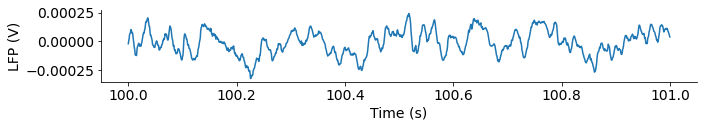

In [ ]:
#plot a random time segment
# check to remove higher frequency
lfpB_slice_lgn_rt = lfpB_slice_lgd.sel(time=slice(100,101))
plt.figure(figsize=(10,2))
_ = plt.plot(lfpB_slice_lgn_rt.time, lfpB_slice_lgn_rt.sel(channel=lfpB_slice_lgn_rt.channel[9]))
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')

In [ ]:
#plot a random time segment
plt.figure(figsize=(8,8))
im = plt.imshow(lfpB_slice_lgn_rt.T,aspect='auto',origin='lower',vmin=-1e-3, vmax=1e-3)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

In [ ]:
# extract unique stimulus types used in the recording
np.unique(session.stimulus_presentations.stimulus_name)

array(['drifting_gratings', 'flashes', 'gabors', 'invalid_presentation',
       'natural_movie_one', 'natural_movie_three', 'natural_scenes',
       'spontaneous', 'static_gratings'], dtype=object)

In [ ]:
# function that calculates lfp aligned to a given stimulus 
def cal_stimalign_lfp(lfp_slice, stim_name):
  presentation_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == stim_name]
  presentation_times = presentation_table.start_time.values
  presentation_ids = presentation_table.index.values
  trial_window = np.arange(-0.1, 0.4, 1/500)
  #print(trial_window)
  time_selection = np.concatenate([trial_window + t for t in presentation_times])

  inds = pd.MultiIndex.from_product((presentation_ids, trial_window), 
                                  names=('presentation_id', 'time_from_presentation_onset'))
  ds = lfp_slice.sel(time = time_selection, method='nearest').to_dataset(name = 'aligned_lfp')
  ds = ds.assign(time=inds).unstack('time')
  aligned_lfp = ds['aligned_lfp']
  return aligned_lfp, trial_window

Align LFP responses to flashes

In [ ]:
aligned_lfp_flash, trial_window = cal_stimalign_lfp(lfpB_slice_lgd, 'flashes')
aligned_lfp_flash

<xarray.DataArray 'aligned_lfp' (channel: 10, presentation_id: 150, time_from_presentation_onset: 250)>
array([[[-9.94500006e-05, -1.14074996e-04, -1.42739998e-04, ...,
         -9.75000003e-05, -8.11200007e-05, -7.50749969e-05],
        [ 6.04499974e-06,  2.59349999e-05,  6.10349998e-05, ...,
         -2.00849991e-05, -3.15899997e-05, -3.39299986e-05],
        [ 1.81350006e-05,  5.96700011e-05,  3.25649999e-05, ...,
          2.14500005e-06,  9.55500036e-06,  1.56000006e-05],
        ...,
        [ 1.39619995e-04,  1.24604994e-04,  1.80570001e-04, ...,
         -8.87249989e-05, -4.71899984e-05, -6.68849971e-05],
        [-3.21750013e-05, -3.00299998e-05,  5.07000004e-06, ...,
          4.54350011e-05,  7.95599990e-05,  9.75000003e-05],
        [ 7.70249972e-05,  2.02800002e-05,  3.88049993e-05, ...,
          3.37349993e-05,  4.42649980e-05,  2.61299992e-05]],

       [[-9.88649990e-05, -1.18949996e-04, -1.64775003e-04, ...,
         -6.57150013e-05, -6.53250027e-05, -9.41850012e-05],
        [ 1.65750007e-05,  4.87500001e-05,  9.84750004e-05, ...,
         -7.40999985e-06, -2.69100001e-05, -6.62999992e-06],
        [-2.57400006e-05,  6.31799994e-05,  3.74400006e-05, ...,
         -3.90000014e-06, -1.54049994e-05,  1.36500000e-06],
        ...,
        [ 1.37865005e-04,  1.26165003e-04,  1.76670001e-04, ...,
         -4.03650010e-05, -1.46249995e-05, -2.78850002e-05],
        [-4.07549996e-05, -4.28999992e-05, -9.55500036e-06, ...,
          6.12299991e-05,  9.98399992e-05,  1.26554994e-04],
        [ 6.55199983e-05,  2.32050006e-05,  3.54900003e-05, ...,
          5.86950009e-05,  3.68549991e-05,  3.10049982e-05]],

       [[-7.68300015e-05, -1.31039997e-04, -1.71794993e-04, ...,
         -5.86950009e-05, -7.68300015e-05, -6.33750024e-05],
        [ 4.68000007e-06,  8.58000021e-06,  9.35999997e-05, ...,
         -4.68000007e-06, -1.28700003e-05,  1.30649996e-05],
        [-1.20899995e-05,  7.09800006e-05,  3.43200009e-05, ...,
          4.29000011e-06, -8.77499951e-06,  2.33999999e-05],
        ...,
        [ 1.61849995e-04,  1.37865005e-04,  1.88174992e-04, ...,
         -5.49899996e-05, -3.45150002e-05, -5.67450006e-05],
        [-4.87500001e-05, -3.52950010e-05, -1.75499997e-06, ...,
          6.61049999e-05,  9.51600014e-05,  1.24604994e-04],
        [ 7.00050005e-05,  3.43200009e-05,  2.67149990e-05, ...,
          1.56000006e-05,  1.57949999e-05,  1.57949999e-05]],

       ...,

       [[-7.25400023e-05, -1.27724998e-04, -2.06894998e-04, ...,
         -1.36500003e-05, -6.47400011e-05, -6.16199977e-05],
        [-1.83299999e-05,  1.42350000e-05,  7.95599990e-05, ...,
          1.75499997e-06,  1.22849997e-05,  3.54900003e-05],
        [ 4.69949991e-05,  8.73600002e-05,  4.71899984e-05, ...,
          1.05299996e-05, -2.53500002e-06, -2.73000001e-06],
        ...,
        [ 2.46870011e-04,  2.10404993e-04,  2.29515004e-04, ...,
         -8.79450017e-05, -9.61350015e-05, -9.63299972e-05],
        [-1.35719994e-04, -9.76949959e-05, -3.95850002e-05, ...,
          1.52100001e-05,  5.26500007e-05,  1.12319998e-04],
        [ 1.99874994e-04,  1.62240001e-04,  1.23435006e-04, ...,
          5.59649998e-05,  5.47950003e-05,  5.44049981e-05]],

       [[-6.78599972e-05, -1.28895001e-04, -1.95194996e-04, ...,
         -9.55500036e-06, -4.13400012e-05, -4.34850008e-05],
        [-1.79399995e-05, -2.53500002e-06,  6.24000022e-05, ...,
          1.46249995e-05,  2.57400006e-05,  4.73850014e-05],
        [ 4.67999998e-05,  9.16499994e-05,  3.56849996e-05, ...,
          6.62999992e-06,  4.09499989e-06, -4.48499986e-06],
        ...,
        [ 2.29319994e-04,  1.99485003e-04,  2.23274998e-04, ...,
         -9.96449962e-05, -1.03740000e-04, -1.07444997e-04],
        [-1.35915005e-04, -9.98399992e-05, -6.00599997e-05, ...,
          6.62999992e-06,  4.36800001e-05,  1.03350001e-04],
        [ 2.02994997e-04,  1.73940003e-04,  1.36304996e-04, ...,
          5.59649998e-05,  5.86950009e-05,  6.24000022e-05]],

       [[-8.22899965e-05, -1

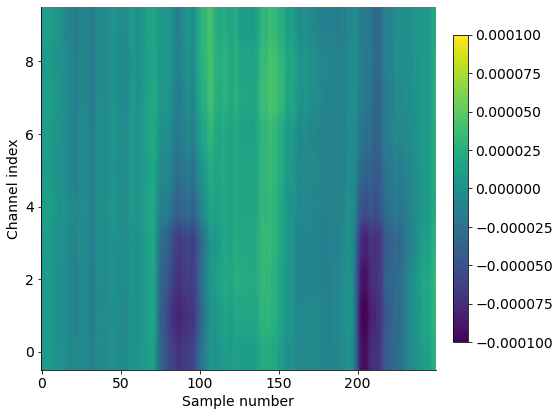

In [ ]:
# mean responses to flashes 
# note: plot averge across channel//spectrogram//separate into running vs. no-running and plot separately//separate by DV and average
# compare with V1 and other nuclei in thalamus 
flash_stimulus_avg = aligned_lfp_flash.mean(dim='presentation_id')
plt.figure(figsize=(8,6))
im = plt.imshow(flash_stimulus_avg, aspect='auto', origin='lower', vmin=-1e-4, vmax=1e-4)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

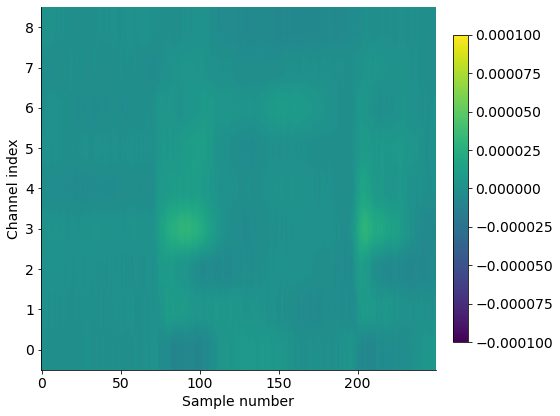

In [ ]:
# calculate dLFP
plt.figure(figsize=(8,6))
flash_dlfp = flash_stimulus_avg.diff(dim = 'channel')
im = plt.imshow(flash_dlfp, aspect='auto', origin='lower', vmin=-1e-4, vmax=1e-4)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

Text(0, 0.5, 'LFP (V)')

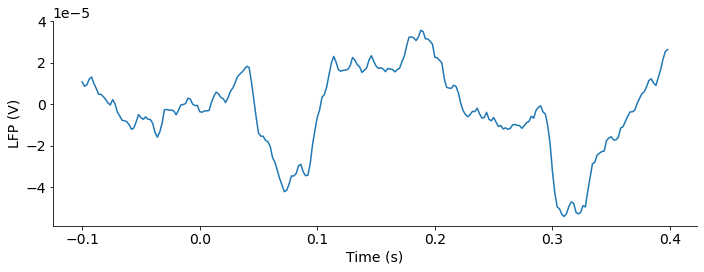

In [ ]:
# avg LFP responses over channels
plt.figure(figsize=(10,4))
mean_flash = flash_stimulus_avg.mean(dim='channel')
_ = plt.plot(trial_window,mean_flash)
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')

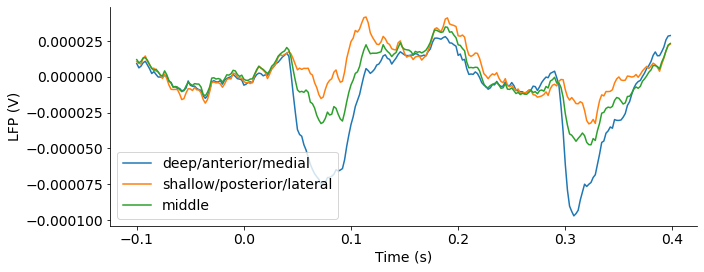

In [ ]:
# avg LFP of channels seggregated by location 
deep_flash_avg = flash_stimulus_avg[0:2,:].mean(dim='channel')
shallow_flash_avg = flash_stimulus_avg[8:10,:].mean(dim='channel')
middle_flash_avg = flash_stimulus_avg[4:6,:].mean(dim='channel')
plt.figure(figsize=(10,4))
_ = plt.plot(trial_window,deep_flash_avg, label='deep/anterior/medial')
_ = plt.plot(trial_window,shallow_flash_avg,label='shallow/posterior/lateral')
_ = plt.plot(trial_window,middle_flash_avg, label='middle')
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.legend()


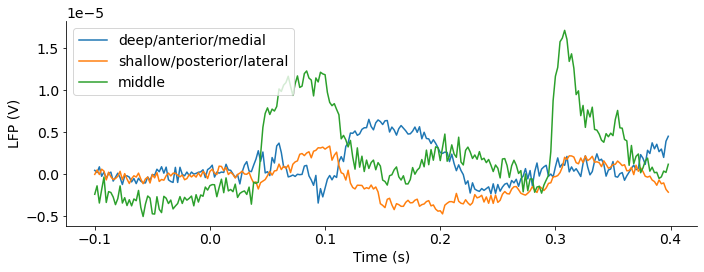

In [ ]:
# avg dLFP of channels seggregated by location 
deep_flash_avg = flash_dlfp[0:2,:].mean(dim='channel')
shallow_flash_avg = flash_dlfp[7:9,:].mean(dim='channel')
middle_flash_avg = flash_dlfp[4:5,:].mean(dim='channel')
plt.figure(figsize=(10,4))
_ = plt.plot(trial_window,deep_flash_avg, label='deep/anterior/medial')
_ = plt.plot(trial_window,shallow_flash_avg,label='shallow/posterior/lateral')
_ = plt.plot(trial_window,middle_flash_avg, label='middle')
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.legend()


In [ ]:
len(mean_flash)

250

Spectrogram analysis

In [ ]:
from scipy import signal
from scipy.fft import fftshift

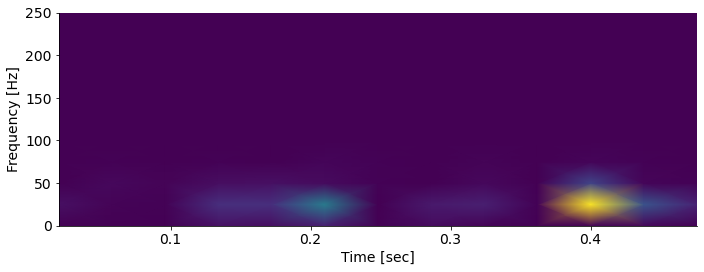

In [ ]:
plt.figure(figsize=(10,4))
fs = 500	
f, t, Sxx = signal.spectrogram(mean_flash, fs,nperseg = 20,window=('hamming'),noverlap =1)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
#plt.pcolormesh(t,f,Sxx)
#plt.colorbar()
plt.show()
#plt.colorbar()

Align LFP responses to static gratings

In [ ]:
aligned_lfp_staticgra, trial_window = cal_stimalign_lfp(lfpC_slice_lp,'static_gratings')

In [ ]:
session.stimulus_presentations.temporal_frequency

In [ ]:
def cal_gratings_lfp(freq):
  presentation_table = session.stimulus_presentations[(session.stimulus_presentations.stimulus_name.str.contains('drifting_gratings')) 
  & (session.stimulus_presentations.temporal_frequency == freq)]
  presentation_times = presentation_table.start_time.values
  presentation_ids = presentation_table.index.values
  trial_window = np.arange(-0.1, 0.4, 1/500)
  time_selection = np.concatenate([trial_window + t for t in presentation_times])

  inds = pd.MultiIndex.from_product((presentation_ids, trial_window), 
                                  names=('presentation_id', 'time_from_presentation_onset'))
  ds = lfpC_slice_lp.sel(time = time_selection, method='nearest').to_dataset(name = 'aligned_lfp')
  ds = ds.assign(time=inds).unstack('time')
  aligned_lfp_staticgra = ds['aligned_lfp']
  return aligned_lfp_staticgra

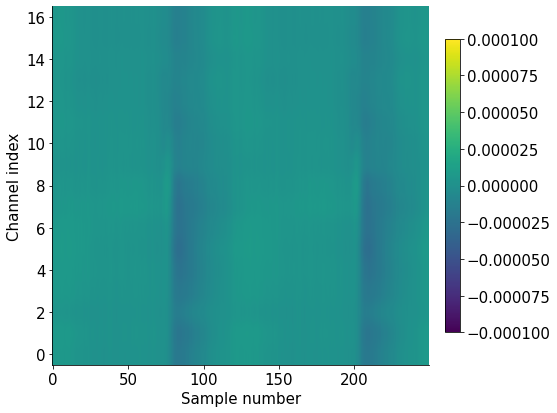

In [ ]:
# mean responses to static gratings 
plt.figure(figsize=(8,6))
aligned_lfp_staticgra_1 = cal_gratings_lfp(15)
grating1_avg = aligned_lfp_staticgra.mean(dim='presentation_id')
im = plt.imshow(grating1_avg, aspect='auto', origin='lower', vmin=-1e-4, vmax=1e-4)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

Text(0, 0.5, 'LFP (V)')

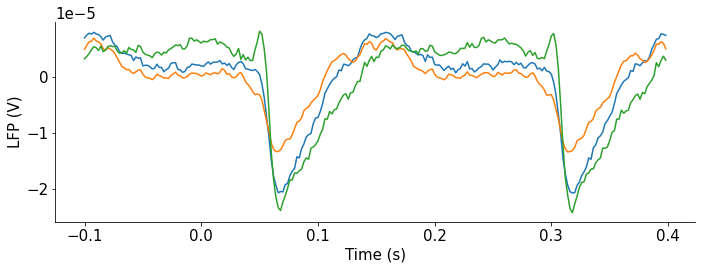

In [ ]:
deep_flash_avg = grating1_avg[0:2,:].mean(dim='channel')
shallow_flash_avg = grating1_avg[15:17,:].mean(dim='channel')
middle_flash_avg = grating1_avg[7:9,:].mean(dim='channel')
plt.figure(figsize=(10,4))
_ = plt.plot(trial_window,deep_flash_avg, label='deep/anterior/medial')
_ = plt.plot(trial_window,shallow_flash_avg,label='shallow/posterior/lateral')
_ = plt.plot(trial_window,middle_flash_avg, label='middle')
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
#plt.legend()

In [ ]:
ori = np.array([1,2,4,8,15])
grating_avg_L = []
grating_channel_avg_L = []
for i in range(len(ori)):
  aligned_lfp_staticgra = cal_gratings_lfp(ori[i])
  grating_avg = aligned_lfp_staticgra.mean(dim='presentation_id')
  grating_avg_L.append(grating_avg)
  grating_avg.mean(dim='channel')
  grating_channel_avg_L.append(grating_avg[7:13,:].mean(dim='channel'))

Text(0, 0.5, 'LFP (V)')

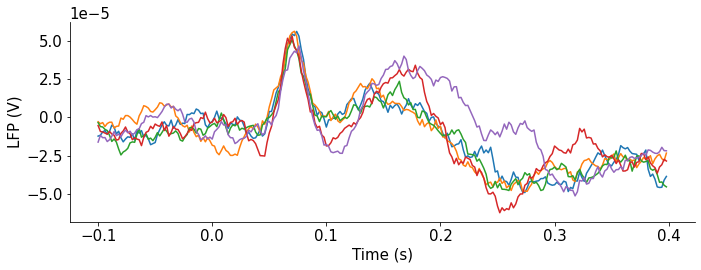

In [ ]:
# avg LFP responses over channels
plt.figure(figsize=(10,4))
for i in range(len(grating_channel_avg_L)):
  _ = plt.plot(trial_window,grating_channel_avg_L[i], label = 'temporal frequency '+str(ori[i]))
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
#plt.set_ylim(-4e-5, 3e-5)
#plt.legend()


In [ ]:
ori = np.array([0, 30, 60, 90, 120, 150])
grating_avg_L = []
grating_channel_avg_L = []
for i in range(len(ori)):
  aligned_lfp_staticgra = cal_gratings_lfp(ori[i])
  grating_avg = aligned_lfp_staticgra.mean(dim='presentation_id')
  grating_avg_L.append(grating_avg)
  grating_channel_avg_L.append(grating_avg[0:3,:].mean(dim='channel'))

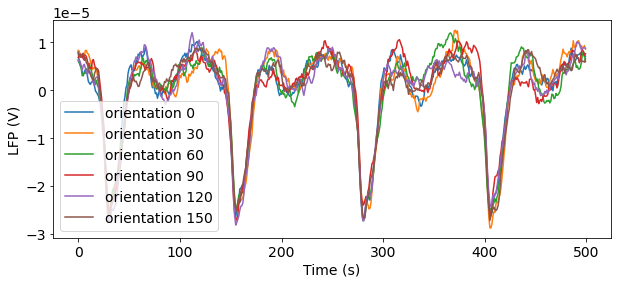

In [ ]:
# avg LFP responses over deep channels
plt.figure(figsize=(10,4))
for i in range(len(grating_channel_avg_L)):
  _ = plt.plot(grating_channel_avg_L[i], label = 'orientation '+str(ori[i]))
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.legend()

In [ ]:
ori = np.array([0, 30, 60, 90, 120, 150])
grating_avg_L = []
grating_channel_avg_L = []
for i in range(len(ori)):
  aligned_lfp_staticgra = cal_gratings_lfp(ori[i])
  grating_avg = aligned_lfp_staticgra.mean(dim='presentation_id')
  grating_avg_L.append(grating_avg)
  grating_channel_avg_L.append(grating_avg[16:19,:].mean(dim='channel'))

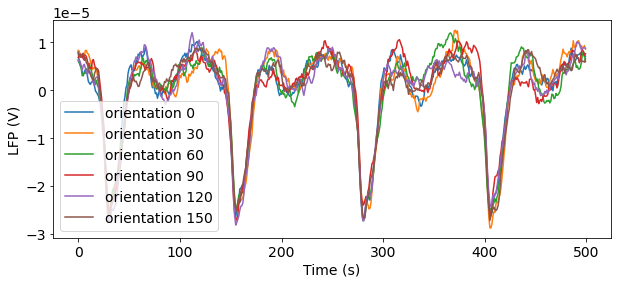

In [ ]:
# avg LFP responses over shallow channels
plt.figure(figsize=(10,4))
for i in range(len(grating_channel_avg_L)):
  _ = plt.plot(grating_channel_avg_L[i], label = 'orientation '+str(ori[i]))
plt.xlabel('Time (s)')
plt.ylabel('LFP (V)')
plt.legend()

Align to running

In [ ]:
fast_running_start_time = np.array(fast_start.start_time)
fast_running_end_time = np.array(fast_end.end_time)
fast_running_time_sele = np.empty((fast_running_start_time.size + fast_running_end_time.size,), dtype=fast_running_start_time.dtype)
fast_running_time_sele[0::2] = fast_running_start_time
fast_running_time_sele[1::2] = fast_running_end_time

In [ ]:
# align to start of running
#presentation_table = session.stimulus_presentations[session.stimulus_presentations.stimulus_name == stim_name]
run_times = fast_start.start_time.values
run_ids = fast_start.index.values
trial_window = np.arange(-0.5, 0.5, 1/500)
  
time_selection = np.concatenate([trial_window + t for t in run_times])

inds = pd.MultiIndex.from_product((run_ids, trial_window), 
                                  names=('run_id', 'time_from_run_onset'))
ds = lfpE_slice_lgn.sel(time = fast_running_time_sele, method='nearest').to_dataset(name = 'aligned_lfp')
ds = ds.assign(time=inds).unstack('time')
aligned_lfp = ds['aligned_lfp']

In [ ]:
plt.figure(figsize=(8,6))
im = plt.imshow(aligned_lfp.mean(dim='run_id'), aspect='auto', origin='lower', vmin=-1e-4, vmax=1e-4)
_ = plt.colorbar(im, fraction=0.036, pad=0.04)
_ = plt.xlabel('Sample number')
_ = plt.ylabel('Channel index')

**Explorations**

3D plotting of spatial locations

Spiking data

In [ ]:
from scipy import stats
from scipy.interpolate import interp1d
# set low/high bound for running speed
r_low_bound = np.percentile(session.running_speed.velocity,30) #<low slow
r_high_bound = np.percentile(session.running_speed.velocity,70)#>high fast
running_speed_midpoints = session.running_speed["start_time"] + \
    (session.running_speed["end_time"] - session.running_speed["start_time"]) / 2
r_time = np.array(running_speed_midpoints)
r_velocity = session.running_speed.velocity
# get w function of velocity wrt time 
f_r = interp1d(r_time, r_velocity)

In [ ]:
# get stimuli of specific type
static_gra = session.stimulus_presentations[
    session.stimulus_presentations['stimulus_name'] == 'static_gratings'
]

drift_gra = session.stimulus_presentations[
    session.stimulus_presentations['stimulus_name'] == 'drifting_gratings'
]

flashes = session.stimulus_presentations[
    session.stimulus_presentations['stimulus_name'] == 'flashes'
]

In [ ]:
(unique, count) = np.unique(static_gra.stimulus_condition_id, return_counts=True)
unique_static_gra = np.asarray((unique, count)).T
unique_static_gra

In [ ]:
# get stimuli of specific spatial frequency 
static_gra_sp = np.unique(static_gra.spatial_frequency)
static_gra_M = []
for i in range(5):
  static_gra_Mi = static_gra[static_gra.spatial_frequency == static_gra_sp[i]]
  static_int = cal_interval(static_gra_Mi)
  static_gra_Mi_idx = [j+1 for j in range(len(static_int)-1) if np.logical_and(static_int[j+1]>0.05, static_int[j]>0.05)]
  static_gra_Mi = static_gra_Mi.iloc[static_gra_Mi_idx]
  static_gra_M.append(static_gra_Mi)

In [ ]:
def cal_interval(stimuli):
  start_t = np.array(stimuli.start_time)
  end_t = np.array(stimuli.stop_time)
  interval = start_t[1:] - end_t[:-1]
  return interval

#flash_int = cal_interval(flashes)
#plt.hist(flash_int)

static_int = cal_interval(static_gra_M[0])
#len(static_int[static_int>0.05])

937

In [ ]:
static_gra_M[0].iloc[10].spatial_frequency

'0.02'

In [ ]:
def cal_modu(stimuli, extra_func, low_bound, high_bound):
  modu_M = np.zeros(len(stimuli))
  start_t = np.array(stimuli.start_time)
  end_t = np.array(stimuli.stop_time)
  for i in range(len(stimuli)):
    stimuli_dur = np.linspace(start_t[i], end_t[i], num = 10000)
    stimuli_v = np.mean(extra_func(stimuli_dur))
    if stimuli_v<low_bound:
      modu_M[i] = -1
    elif stimuli_v>high_bound:
      modu_M[i] = 1
    else:
      pass
  return modu_M
r_modu_M = cal_modu(static_gra, f_r, r_low_bound, r_high_bound)
static_gra['running_index'] = r_modu_M

In [ ]:
gaze_data = session.get_screen_gaze_data()
gaze_data = gaze_data.dropna()
g_time = gaze_data.index
g_area = gaze_data.raw_pupil_area
f_g = interp1d(g_time, g_area)
a_low_bound = np.percentile(g_area,30) #<low 
a_high_bound = np.percentile(g_area,70)#>high 

In [ ]:
a_modu_M = cal_modu(static_gra, f_g, a_low_bound, a_high_bound)
static_gra['arousal_index'] = a_modu_M

In [ ]:
from allensdk.brain_observatory.ecephys.visualization import plot_mean_waveforms, plot_spike_counts, raster_plot
from allensdk.brain_observatory.visualization import plot_running_speed
# To do that, we will need to specify some bins (in seconds, relative to stimulus onset)
time_bin_edges = np.linspace(-0.04, 0.29, 200)

# select relevant stimuli
def select_stim(stimuli, index, level):
  relev_stimuli = stimuli[stimuli[index] == level]
  relev_stimuli_id = relev_stimuli.index.values
  return relev_stimuli, relev_stimuli_id

relev_stimuli_ha, relev_stimuli_ha_id = select_stim(static_gra, 'arousal_index', 1)
relev_stimuli_la, relev_stimuli_la_id = select_stim(static_gra, 'arousal_index', -1)
relev_stimuli_id = static_gra.index.values

# and get a set of units with only decent snr in lgn
decent_snr_unit_ids = session.units[
    session.units['snr'] >= 1.5
].index.values

decent_snr_unit_lgn = session.units[np.logical_and(session.units['snr'] >= 1.5, session.units["ecephys_structure_acronym"] == 'LGd')]#.sort_values(by=['dorsal_ventral_ccf_coordinate'])
decent_snr_unit_ids_lgn = decent_snr_unit_lgn.index.values

# stimuli aligned histogram
spike_counts_da = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=relev_stimuli_ha_id,
    unit_ids=decent_snr_unit_ids_lgn
)
mean_spike_counts_l = spike_counts_da.mean(dim='stimulus_presentation_id')
mean_spike_counts

/usr/local/lib/python3.7/dist-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:644: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (7, 8), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (28, 29), (29, 30), (31, 32), (32, 33), (33, 34), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (53, 54), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (63, 64), (67, 68), (68, 69), (71, 72), (72, 73), (73, 74), (74, 75), (75, 76), (76, 77), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 

<xarray.DataArray 'spike_counts' (time_relative_to_stimulus_onset: 199, unit_id: 57)>
array([[0.0228597 , 0.02913492, 0.02330793, ..., 0.03137606, 0.02958315,
        0.02823846],
       [0.03003138, 0.03047961, 0.02196325, ..., 0.02779023, 0.02779023,
        0.02510085],
       [0.02241147, 0.03316898, 0.02151502, ..., 0.02689377, 0.02465262,
        0.02689377],
       ...,
       [0.02375616, 0.02868669, 0.0197221 , ..., 0.01792918, 0.02958315,
        0.01568803],
       [0.02823846, 0.03272075, 0.01613626, ..., 0.02106679, 0.02689377,
        0.01927387],
       [0.02644554, 0.03451367, 0.01792918, ..., 0.01748095, 0.02644554,
        0.01882564]])
Coordinates:
  * time_relative_to_stimulus_onset  (time_relative_to_stimulus_onset) float64 -0.00897 ... 0.399
  * unit_id                          (unit_id) int64 951804625 ... 951805978

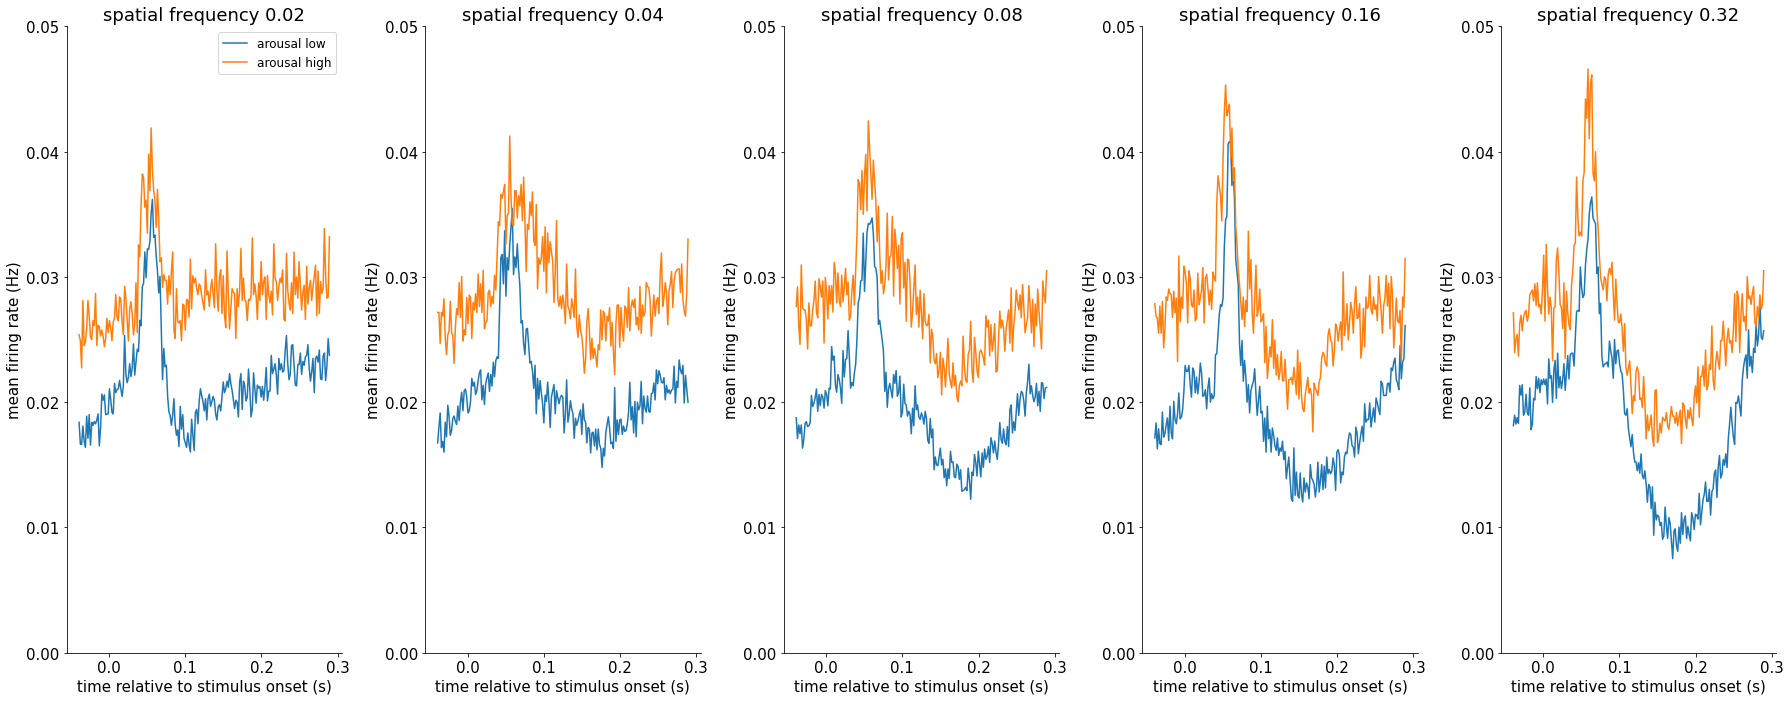

In [ ]:
plt.figure(figsize= (30, 10))
for i in range(5):
  ax = plt.subplot(1,6,i+1)
  relev_stimuli_ha, relev_stimuli_ha_id = select_stim(static_gra_M[i], 'arousal_index', 1)
  relev_stimuli_la, relev_stimuli_la_id = select_stim(static_gra_M[i], 'arousal_index', -1)
  spike_counts_da_h = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=relev_stimuli_ha_id,
    unit_ids=decent_snr_unit_ids_lgn
  )
  mean_spike_counts_h= spike_counts_da_h.mean(dim='stimulus_presentation_id')
  mean_spike_counts_h = mean_spike_counts_h.mean(dim='unit_id')
  spike_counts_da_l = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=relev_stimuli_la_id,
    unit_ids=decent_snr_unit_ids_lgn
  )
  mean_spike_counts_l = spike_counts_da_l.mean(dim='stimulus_presentation_id')
  mean_spike_counts_l = mean_spike_counts_l.mean(dim='unit_id')
  plt.plot(mean_spike_counts_l['time_relative_to_stimulus_onset'], mean_spike_counts_l)
  plt.plot(mean_spike_counts_h['time_relative_to_stimulus_onset'], mean_spike_counts_h)
  ax.set(xlabel = 'time relative to stimulus onset (s)', ylabel = 'mean firing rate (Hz)')
  ax.set_ylim(0,0.05)
  plt.title('spatial frequency '+str(static_gra_sp[i]))
  if i==0:
    plt.legend(['arousal low', 'arousal high'], fontsize=12)

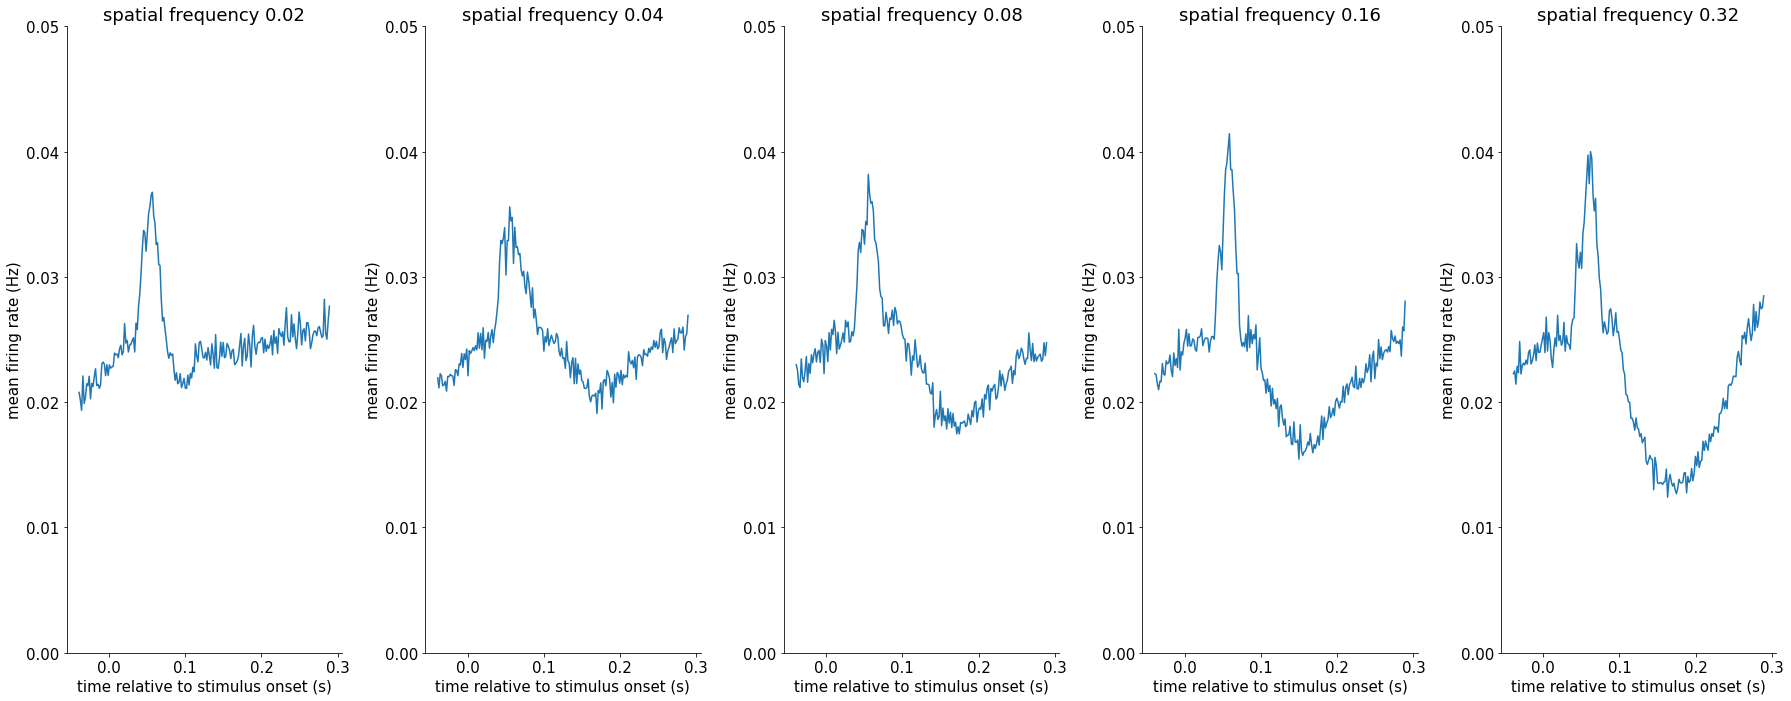

In [ ]:
plt.figure(figsize= (30, 10))
for i in range(5):
  ax = plt.subplot(1,6,i+1)
  relev_stimuli_id = static_gra_M[i].index.values
  #relev_stimuli_la, relev_stimuli_la_id = select_stim(static_gra_M[i], 'arousal_index', -1)
  spike_counts_da = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=relev_stimuli_id,
    unit_ids=decent_snr_unit_ids_lgn
  )
  mean_spike_counts = spike_counts_da.mean(dim='stimulus_presentation_id')
  mean_spike_counts = mean_spike_counts.mean(dim='unit_id')
  plt.plot(mean_spike_counts['time_relative_to_stimulus_onset'], mean_spike_counts)
  #plt.plot(mean_spike_counts_h['time_relative_to_stimulus_onset'], mean_spike_counts_h)
  ax.set(xlabel = 'time relative to stimulus onset (s)', ylabel = 'mean firing rate (Hz)')
  ax.set_ylim(0,0.05)
  plt.title('spatial frequency '+str(static_gra_sp[i]))

In [ ]:
# MI = [RHighArousal – RLowArousal]/RAllTrials
def cal_MI(time_bin, units, stim):
  spike_counts_da_h = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=relev_stimuli_ha_id,
    unit_ids=decent_snr_unit_ids_lgn)
  mean_spike_counts_h = spike_counts_da_h.mean(dim='stimulus_presentation_id')
  spike_counts_da_l = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=relev_stimuli_la_id,
    unit_ids=decent_snr_unit_ids_lgn)
  mean_spike_counts_l = spike_counts_da_l.mean(dim='stimulus_presentation_id')
  spike_counts_da = session.presentationwise_spike_counts(
    bin_edges=time_bin_edges,
    stimulus_presentation_ids=relev_stimuli_id,
    unit_ids=decent_snr_unit_ids_lgn)
  #mean_spike_counts_all spike_counts_da.mean(dim='stimulus_presentation_id')
  

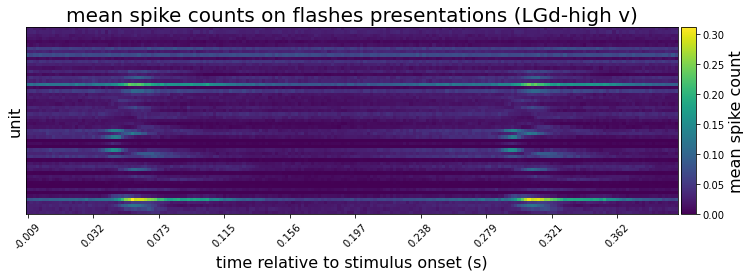

In [ ]:
mean_spike_counts = spike_counts_da.mean(dim='stimulus_presentation_id')
plot_spike_counts(
    mean_spike_counts, 
    mean_spike_counts['time_relative_to_stimulus_onset'],
    'mean spike count', 
    'mean spike counts on flashes presentations (LGd-high v)'
)
plt.show()

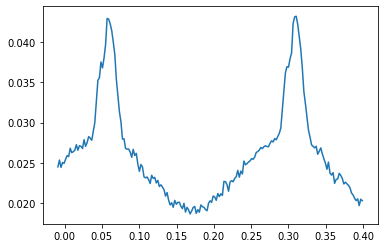

In [ ]:
mean_spike_counts_ha = mean_spike_counts.mean(dim='unit_id')
plt.plot(mean_spike_counts['time_relative_to_stimulus_onset'], mean_spike_counts_ha)

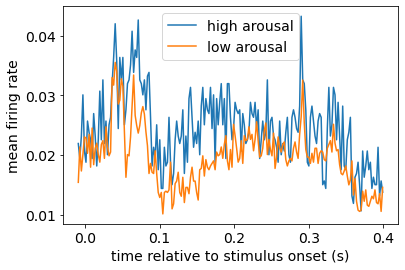

In [ ]:
mean_spike_counts_la = mean_spike_counts.mean(dim='unit_id')
plt.plot(mean_spike_counts['time_relative_to_stimulus_onset'], mean_spike_counts_ha)
plt.plot(mean_spike_counts['time_relative_to_stimulus_onset'], mean_spike_counts_la)
plt.xlabel('time relative to stimulus onset (s)')
plt.ylabel('mean firing rate')
plt.legend(['high arousal', 'low arousal'])

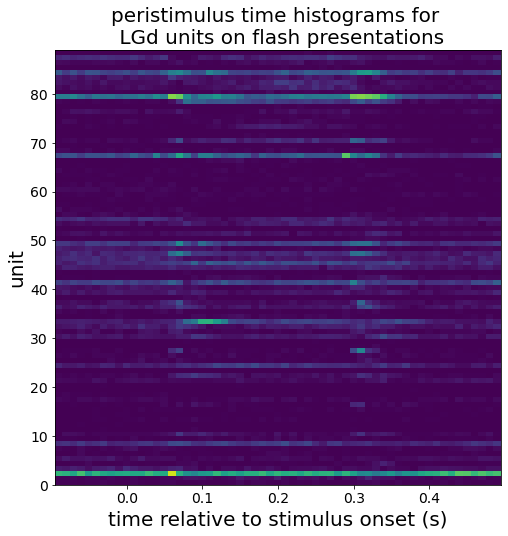

In [ ]:
mean_histograms = histograms.mean(dim="stimulus_presentation_id")
fig, ax = plt.subplots(figsize=(8, 8))
ax.pcolormesh(
    mean_histograms["time_relative_to_stimulus_onset"], 
    np.arange(mean_histograms["unit_id"].size),
    mean_histograms.T, 
    vmin=0,
    vmax=1
)

ax.set_ylabel("unit", fontsize=20)
ax.set_xlabel("time relative to stimulus onset (s)", fontsize=20)
ax.set_title("peristimulus time histograms for \n LGd units on flash presentations", fontsize=20)

plt.show()

In [ ]:
# Get all VIS units and some thlamic units.
struct = 'VISp'
units = (session.units[session.units.ecephys_structure_acronym.str.contains(struct)]).index
units

/usr/local/lib/python3.7/dist-packages/allensdk/brain_observatory/ecephys/ecephys_project_api/ecephys_project_warehouse_api.py:291: FutureWarning: Conversion of the second argument of issubdtype from `bool` to `np.generic` is deprecated. In future, it will be treated as `np.bool_ == np.dtype(bool).type`.
  pv_is_bool = np.issubdtype(output["p_value_rf"].values[0], np.bool)


Int64Index([951820547, 951820541, 951820551, 951820565, 951820595, 951821627,
            951820580, 951820574, 951820631, 951820623,
            ...
            951811504, 951811494, 951811546, 951811535, 951811578, 951811558,
            951812326, 951811646, 951811789, 951811778],
           dtype='int64', name='unit_id', length=141)

In [ ]:
# lgn units
lgd_unit = session.units[session.units.ecephys_structure_acronym.str.contains('LGd')]
len(lgd_unit)

60

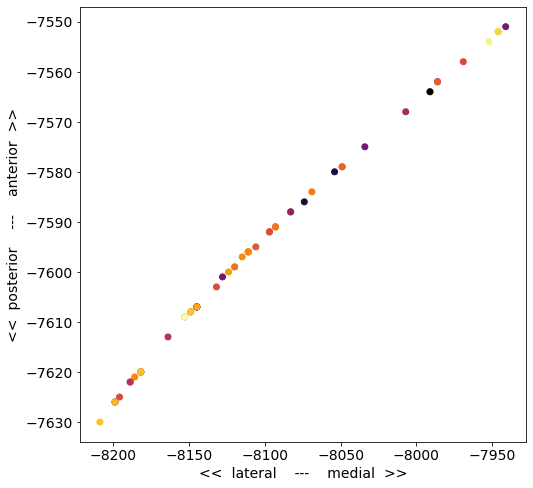

In [ ]:
#lgd_unit['run_mod_fl']
x_coords = lgd_unit.left_right_ccf_coordinate
y_coords = lgd_unit.anterior_posterior_ccf_coordinate
#color = lgd_unit['pref_phase_sg']
color = lgd_unit['run_mod_rf']
plt.figure(figsize=(8,8))
_ = plt.scatter(-x_coords[x_coords > 0], -y_coords[x_coords > 0], c=color[x_coords > 0], cmap='inferno')
_ = plt.xlabel('<<  lateral    ---    medial  >>')
_ = plt.ylabel('<<  posterior    ---    anterior  >>')

In [ ]:
spontaneous_trials

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
0,null,null,null,null,null,null,null,24.429348,null,spontaneous,84.496188,null,null,null,60.066840,0
3646,null,null,null,null,null,null,null,996.491813,null,spontaneous,1285.483398,null,null,null,288.991585,0
3797,null,null,null,null,null,null,null,1583.982946,null,spontaneous,1585.734418,null,null,null,1.751472,0
3998,null,null,null,null,null,null,null,2185.235561,null,spontaneous,2216.261498,null,null,null,31.025937,0
21999,null,null,null,null,null,null,null,2816.763498,null,spontaneous,2846.788598,null,null,null,30.025100,0
31000,null,null,null,null,null,null,null,3147.039578,null,spontaneous,3177.064688,null,null,null,30.025110,0
31201,null,null,null,null,null,null,null,3776.565851,null,spontaneous,4077.834348,null,null,null,301.268497,0
49202,null,null,null,null,null,null,null,4678.336348,null,spontaneous,4708.361438,null,null,null,30.025090,0
49433,null,null,null,null,null,null,null,5397.937871,null,spontaneous,5398.938718,null,null,null,1.000847,0


In [ ]:
spontaneous_trials = session.stimulus_presentations[session.stimulus_presentations.stimulus_name.str.contains('spontaneous')]

In [ ]:
# calculating binned spiking rate
def spike_rate(unit):
  spike_time = session.spike_times[unit]
  bins = np.linspace(0,10e03,10000000)
  spike_index = np.digitize(spike_time, bins)
  (unique, counts) = np.unique(spike_index, return_counts=True)
  rate = np.asarray((unique, counts)).T
  bins_ind = np.linspace(1200000, 1600000, num=400001).astype(int)
  rate_M = np.zeros((len(bins_ind),2)) 
  rate_M[:,0] = bins_ind
  for i in range(len(bins_ind)):
    if bins_ind[i] in rate[:,0]:
    #print(np.where(rate[:,0] == bins_ind[i])[0])
      index_r = int(np.where(rate[:,0] == bins_ind[i])[0])
      rate_M[i,1] = rate[index_r,1]
    else:
      rate_M[i,1] = 0
  return rate_M

In [ ]:
rate_M = spike_rate(951804625)

In [ ]:
# calculate LGN spiking matrix
lgn_index = lgd_unit.index
lgn_spike_M = np.zeros((len(lgd_unit), 400001))
for i in range(len(lgd_unit)):
  rate_M = spike_rate(lgn_index[i])
  lgn_spike_M[i, :] = rate_M[:,1]

In [ ]:
lgn_spike_M

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [ ]:
len(pupil_hori)

278901

In [ ]:
np.unique(session.units.ecephys_structure_acronym)
# thalamus (LGd, LD, LP, VPM, TH, MGm, MGv, MGd, PO, LGv, VL, VPL, POL, Eth, PoT, PP, PIL, IntG, IGL, SGN, VPL, PF, RT)

array(['APN', 'CA1', 'CA3', 'DG', 'Eth', 'LGd', 'LP', 'MB', 'PO', 'POL',
       'SCig', 'SUB', 'TH', 'VISal', 'VISam', 'VISl', 'VISp', 'VISpm',
       'VISrl', 'VPM'], dtype=object)

In [ ]:
# use 1 unit as an example
example_unit = 951804625
spike_time = session.spike_times[example_unit]
bins = np.linspace(0,10e03,10000000)
spike_index = np.digitize(spike_time, bins)

In [ ]:
(unique, counts) = np.unique(spike_index, return_counts=True)
rate = np.asarray((unique, counts)).T
rate

array([[   5830,       1],
       [   6145,       1],
       [   6155,       1],
       ...,
       [9949815,       1],
       [9949877,       1],
       [9949949,       1]])

In [ ]:
# spiking rate for each bin
bins_ind = np.arange(10000000)
rate_M = np.zeros((len(bins_ind),2)) 
rate_M[:,0] = bins_ind
for i in range(len(bins_ind)):
  if bins_ind[i] in rate[:,0]:
    #print(np.where(rate[:,0] == bins_ind[i])[0])
    index_r = int(np.where(rate[:,0] == bins_ind[i])[0])
    rate_M[i,1] = rate[index_r,1]
  else:
    rate_M[i,1] = 0

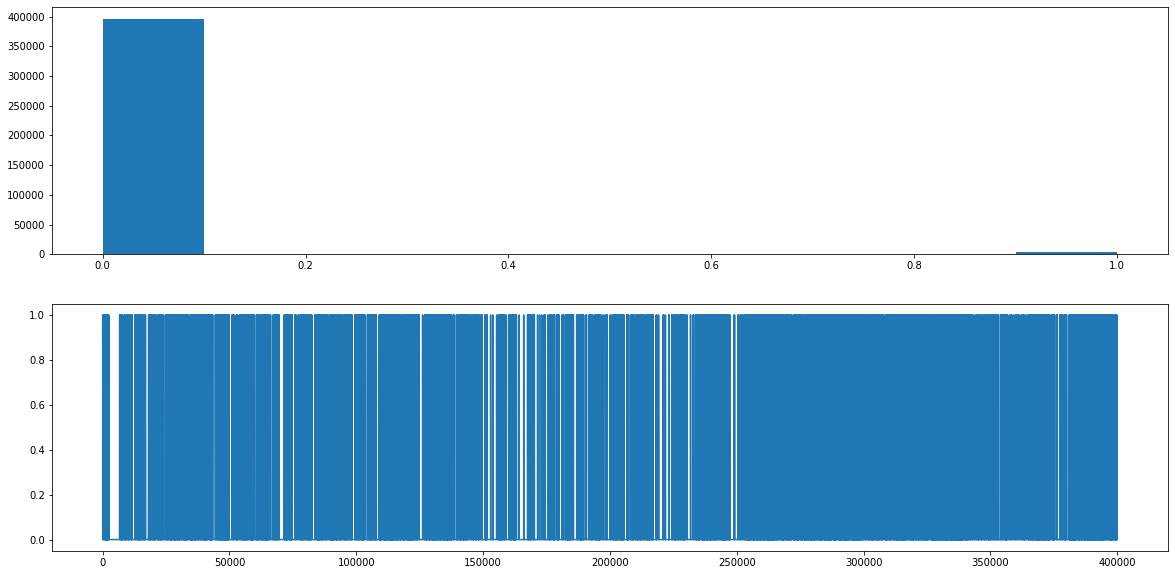

In [ ]:
# check a single unit firing statistics 
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2,1, figsize = (20,10))
ax[0].hist(rate_M[:,1]);
ax[1].plot(rate_M[:,1])

In [ ]:
num_spike = []
max_time = []
for unit in units:
    sums.append([unit,len(session.spike_times[unit])])
    max_time.append([unit,max(session.spike_times[unit])])

In [ ]:
session.stimulus_presentations.head(5)
np.unique(session.stimulus_presentations.stimulus_name)

array(['drifting_gratings', 'flashes', 'gabors', 'natural_movie_one',
       'natural_movie_three', 'natural_scenes', 'spontaneous',
       'static_gratings'], dtype=object)

I. Gabor

In [ ]:
#len(session.stimulus_presentations)
gabor_trials = session.stimulus_presentations[session.stimulus_presentations.stimulus_name.str.contains('gabor')]
gabor_trials

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
1,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.496188,0,gabors,84.729704,4,40,30,0.233516,1
2,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.729704,0,gabors,84.979900,4,-30,10,0.250196,2
3,null,0.8,null,90,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.979900,0,gabors,85.230095,4,10,-10,0.250196,3
4,null,0.8,null,90,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,85.230095,0,gabors,85.480291,4,30,40,0.250196,4
5,null,0.8,null,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,85.480291,0,gabors,85.730518,4,30,10,0.250227,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641,null,0.8,null,90,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,995.240758,0,gabors,995.490969,4,30,-30,0.250211,215
3642,null,0.8,null,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,995.490969,0,gabors,995.741179,4,-10,-10,0.250211,158
3643,null,0.8,null,0,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,995.741179,0,gabors,995.991390,4,-10,40,0.250211,234


In [ ]:
gabor_time_s = gabor_trials.start_time
gabor_cond = gabor_trials.stimulus_condition_id
# number of conditions tested for gabor stimuli; number of repeats for each condition 
unique_cond, num_cond = np.unique(gabor_cond, return_counts=True)
unique_cond, num_cond

(array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
         53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
         66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
         79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
         92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
        105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
        118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
        131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
        144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
        157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
        170, 171, 172, 173, 174, 175, 176, 177, 178

In [ ]:
session.stimulus_presentations[session.stimulus_presentations.stimulus_condition_id == 1]

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
1,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,84.496188,0,gabors,84.729704,4,40,30,0.233516,1
589,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,231.602381,0,gabors,231.852600,4,40,30,0.250219,1
594,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,232.853459,0,gabors,233.103659,4,40,30,0.250201,1
1166,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,375.973065,0,gabors,376.223279,4,40,30,0.250214,1
1340,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,419.509445,0,gabors,419.759651,4,40,30,0.250206,1
1643,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,495.322829,0,gabors,495.573035,4,40,30,0.250206,1
1790,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,532.103583,0,gabors,532.353794,4,40,30,0.250212,1
2192,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,632.687676,0,gabors,632.937888,4,40,30,0.250212,1
2292,null,0.8,null,45,"[3644.93333333, 3644.93333333]","[20.0, 20.0]",0.08,657.708585,0,gabors,657.958791,4,40,30,0.250206,1


In [ ]:
keys = gabor_trials.keys()
[key for key in keys if len(np.unique(gabor_trials[key])) > 1]

['orientation',
 'start_time',
 'stop_time',
 'x_position',
 'y_position',
 'duration',
 'stimulus_condition_id']

In [ ]:
gabor_trials['contrast']

stimulus_presentation_id
1       0.8
2       0.8
3       0.8
4       0.8
5       0.8
       ... 
3641    0.8
3642    0.8
3643    0.8
3644    0.8
3645    0.8
Name: contrast, Length: 3645, dtype: object

In [ ]:
print('Unique orientations : ' + str(list(np.sort(gabor_trials.orientation.unique()))))
print('Unique x positions : ' + str(list(np.sort(gabor_trials.x_position.unique()))))
print('Unique y positions : ' + str(list(np.sort(gabor_trials.y_position.unique()))))

Unique orientations : [0.0, 45.0, 90.0]
Unique x positions : [-40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0]
Unique y positions : [-40.0, -30.0, -20.0, -10.0, 0.0, 10.0, 20.0, 30.0, 40.0]


In [ ]:
from allensdk.brain_observatory.ecephys.stimulus_analysis.receptive_field_mapping import ReceptiveFieldMapping

rf_mapping = ReceptiveFieldMapping(session)

In [ ]:
RF = rf_mapping.get_receptive_field(example_unit)

/usr/local/lib/python3.6/dist-packages/allensdk/brain_observatory/ecephys/ecephys_session.py:644: UserWarning: You've specified some overlapping time intervals between neighboring rows: [(0, 1)], with a maximum overlap of 0.015484041324228315 seconds.
  warnings.warn(f"You've specified some overlapping time intervals between neighboring rows: {overlapping}, "


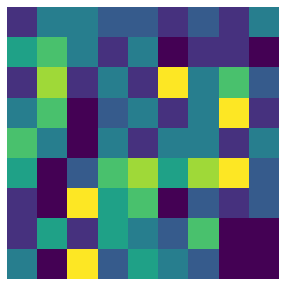

In [ ]:
plt.figure(figsize=(5,5))
_ = plt.imshow(RF)
_ = plt.axis('off')

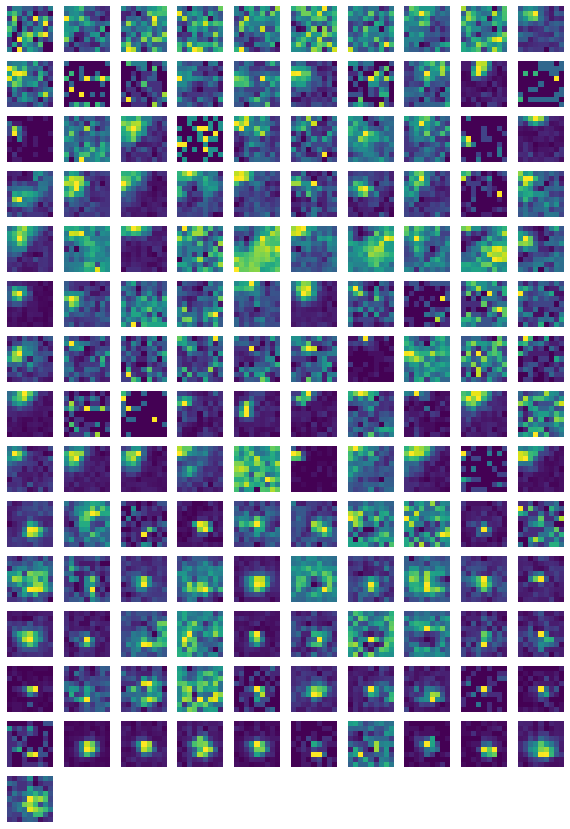

In [ ]:
def plot_rf(unit_id, index):
    RF = rf_mapping.get_receptive_field(unit_id)
    _ = plt.subplot(15,10,index+1)
    _ = plt.imshow(RF)
    _ = plt.axis('off')
    
_ = plt.figure(figsize=(10,15))
_ = [plot_rf(RF, index) for index, RF in enumerate(units)]

II. Drift Gratings

In [ ]:
drift_grating = session.stimulus_presentations[session.stimulus_presentations.stimulus_name.str.contains('drifting_gratings')]
drift_grating

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
3798,null,0.8,null,180,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1585.734418,2,drifting_gratings,1587.736098,2,null,null,2.00168,246
3799,null,0.8,null,135,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1588.736891,2,drifting_gratings,1590.738571,2,null,null,2.00168,247
3800,null,0.8,null,180,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1591.739398,2,drifting_gratings,1593.741078,2,null,null,2.00168,246
3801,null,0.8,null,270,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1594.741921,2,drifting_gratings,1596.743591,2,null,null,2.00167,248
3802,null,0.8,null,135,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,1597.744458,2,drifting_gratings,1599.746088,4,null,null,2.00163,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49428,null,0.8,null,45,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,5383.926161,7,drifting_gratings,5385.927841,4,null,null,2.00168,259
49429,null,0.8,null,0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,5386.928658,7,drifting_gratings,5388.930338,1,null,null,2.00168,285
49430,null,0.8,null,270,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,5389.931191,7,drifting_gratings,5391.932841,15,null,null,2.00165,280


In [ ]:
keys = drift_grating.keys()
#keys
#np.unique(drift_grating['spatial_frequency'])
unique_params = [key for key in keys if len(np.unique(np.delete(np.array(drift_grating[key]), np.where(np.array(drift_grating[key]) == 'null')))) > 1]
unique_params = ['orientation','stimulus_block','temporal_frequency']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  after removing the cwd from sys.path.


In [ ]:
drift_grating[drift_grating.stimulus_block == 5]

,color,contrast,frame,orientation,phase,size,spatial_frequency,start_time,stimulus_block,stimulus_name,stop_time,temporal_frequency,x_position,y_position,duration,stimulus_condition_id
stimulus_presentation_id,,,,,,,,,,,,,,,,
31001,null,0.8,null,270,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,3177.064688,5,drifting_gratings,3179.066368,4,null,null,2.00168,251
31002,null,0.8,null,0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,3180.067191,5,drifting_gratings,3182.068871,4,null,null,2.00168,252
31003,null,0.8,null,225,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,3183.069698,5,drifting_gratings,3185.071398,15,null,null,2.00170,275
31004,null,0.8,null,225,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,3186.072231,5,drifting_gratings,3188.073901,8,null,null,2.00167,262
31005,null,0.8,null,0,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,3189.074748,5,drifting_gratings,3191.076408,15,null,null,2.00166,282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31196,null,0.8,null,270,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,3762.554131,5,drifting_gratings,3764.555811,4,null,null,2.00168,251
31197,null,null,null,null,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",null,3765.556628,5,drifting_gratings,3767.558298,null,null,null,2.00167,267
31198,null,0.8,null,270,"[42471.86666667, 42471.86666667]","[250.0, 250.0]",0.04,3768.559161,5,drifting_gratings,3770.560831,2,null,null,2.00167,248


In [ ]:
orientation_a = np.array(drift_grating['orientation'])
orientation_a = np.delete(orientation_a, np.where(orientation_a == 'null'))
print('Unique orientations : ' + str(list(np.sort(np.unique(orientation_a)))))
stimulus_block_a = np.array(drift_grating.stimulus_block)
stimulus_block_a = np.delete(stimulus_block_a, np.where(stimulus_block_a == 'null'))
print('Unique stimulus block : ' + str(list(np.sort(np.unique(stimulus_block_a)))))
temporal_frequency_a = np.array(drift_grating.temporal_frequency)
temporal_frequency_a = np.delete(temporal_frequency_a, np.where(temporal_frequency_a == 'null'))
print('Unique temporal frequency : ' + str(list(np.sort(np.unique(temporal_frequency_a)))))

Unique orientations : [0.0, 45.0, 90.0, 135.0, 180.0, 225.0, 270.0, 315.0]
Unique stimulus block : [2.0, 5.0, 7.0]
Unique temporal frequency : [1.0, 2.0, 4.0, 8.0, 15.0]


In [ ]:
unique_params = ['orientation','temporal_frequency']

In [ ]:
def calc_time_stamp(stimuli, unique_params):
  unique_conds = np.unique(stimuli.stimulus_condition_id)
  cond_time_stamp = []
  cond_param = []
  for i in range(len(unique_conds)):
    cond_id = unique_conds[i]
    cond_i = stimuli[stimuli.stimulus_condition_id == cond_id]
    cond_i_param = []
    for j in range(len(unique_params)):
      param_val = np.array(cond_i[unique_params[j]])
      cond_i_param.append(param_val[0])
    start_time_i = np.array(cond_i.start_time)
    end_time_i = np.array(cond_i.stop_time)
    time_stamp_i = np.sort(np.concatenate((start_time_i,end_time_i)))
    cond_time_stamp.append(time_stamp_i)
    cond_param.append(cond_i_param)
  return unique_conds, cond_time_stamp, cond_param

In [ ]:
unique_conds, cond_time_stamp, cond_param = calc_time_stamp(drift_grating, unique_params)

In [ ]:
def cond_specific_tuning(cond_time_stamp,rate_M):
  cond_specific_tuning = []
  for i in range(len(cond_time_stamp)):
    cond_time_stamp_i = cond_time_stamp[i]
    binned_rate = np.digitize(rate_M[:,0],cond_time_stamp_i)
    #print(binned_rate)
    cond_specific_i = []
    for j in range(len(binned_rate)):
      if np.mod(binned_rate[j],2)==1:
        cond_specific_i.append(rate_M[j,1])
    cond_specific_tuning.append(cond_specific_i)
  return cond_specific_tuning

In [ ]:
cond_specific_tuning_M = cond_specific_tuning(cond_time_stamp,rate_M)

In [ ]:
avg_rate_tuning = [np.sum(i)/len(i) for i in cond_specific_tuning_M]

In [ ]:
rate_M

array([[0.0000e+00, 0.0000e+00],
       [1.0000e+00, 0.0000e+00],
       [2.0000e+00, 0.0000e+00],
       ...,
       [9.9997e+04, 0.0000e+00],
       [9.9998e+04, 0.0000e+00],
       [9.9999e+04, 0.0000e+00]])

In [ ]:
session.units.pref_ori_dg

unit_id
951814884    180.0
951814876    315.0
951815032    135.0
951815275    135.0
951815314    135.0
             ...  
951814089     45.0
951814212     90.0
951814199     90.0
951814190      0.0
951814312     45.0
Name: pref_ori_dg, Length: 684, dtype: float64

III. Static gratings

In [ ]:
#session.stimulus_presentations[(session.stimulus_presentations.stimulus_name.str.contains('static_gratings')) 
#& (session.stimulus_presentations.orientation == 30)]
sg_ori = session.stimulus_presentations.orientation[session.stimulus_presentations.orientation != 'null']
np.unique(sg_ori)

array([0.0, 30.0, 45.0, 60.0, 90.0, 120.0, 135.0, 150.0, 180.0, 225.0,
       270.0, 315.0], dtype=object)

Running & Pupil data

In [ ]:
session.running_speed

,start_time,end_time,velocity
0,24.37776,24.39337,12.777751
1,24.39337,24.41040,8.401484
2,24.42658,24.44328,6.234442
3,24.44328,24.46028,8.180168
4,24.47657,24.49327,11.104375
...,...,...,...
365383,9211.93997,9211.95664,56.253927
365384,9211.95664,9211.97343,56.706055
365385,9211.99004,9212.00671,57.142214
365386,9212.00671,9212.02344,58.188121


In [ ]:
from scipy import stats
low_bound = np.percentile(session.running_speed.velocity,30) #<low slow
high_bound = np.percentile(session.running_speed.velocity,70)#>high fast
fast_session = session.running_speed[session.running_speed.velocity>=high_bound]
slow_session = session.running_speed[session.running_speed.velocity<=low_bound]

In [ ]:
fast_session

,start_time,end_time,velocity
25,24.99336,25.00993,28.922247
26,25.02673,25.04346,35.454988
27,25.04346,25.06003,36.521687
28,25.07721,25.09379,41.159513
29,25.09379,25.11050,43.327731
...,...,...,...
365383,9211.93997,9211.95664,56.253927
365384,9211.95664,9211.97343,56.706055
365385,9211.99004,9212.00671,57.142214
365386,9212.00671,9212.02344,58.188121


In [ ]:
run_end_time = np.array(session.running_speed.end_time)
run_start_time = np.array(session.running_speed.start_time)
len(run_end_time)

365388

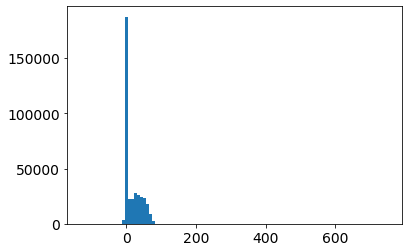

In [ ]:
# plot distribution of running velocity
plt.hist(session.running_speed.velocity,bins=100);

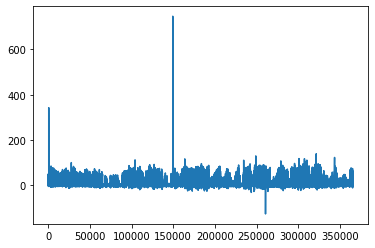

In [ ]:
plt.plot(session.running_speed.velocity)

In [ ]:
session.running_speed.iloc[9,0]

24.59334

In [ ]:
fast_session_start_index = [i for i in session.running_speed.index[1:] if session.running_speed.iloc[i,2]>high_bound and session.running_speed.iloc[i-1,2]<high_bound]
fast_session_start_index = np.array(fast_session_start_index)
fast_start = session.running_speed.loc[fast_session_start_index]

In [ ]:
fast_session_end_index = [i-1 for i in session.running_speed.index[1:] if session.running_speed.iloc[i,2]<high_bound and session.running_speed.iloc[i-1,2]>high_bound]
fast_session_end_index = np.array(fast_session_end_index)
fast_end = session.running_speed.loc[fast_session_end_index]

In [ ]:
fast_start

,start_time,end_time,velocity
25,24.99336,25.00993,28.922247
55,25.77881,25.79341,39.712357
62,25.94371,25.96042,31.063691
65,26.02711,26.04377,30.695662
67,26.07792,26.09461,29.755414
...,...,...,...
365025,9202.86581,9202.88259,28.091683
365143,9205.83496,9205.85161,31.641985
365288,9209.53806,9209.55487,30.114612
365295,9209.70495,9209.72187,28.674048


In [ ]:
fast_end

,start_time,end_time,velocity
53,25.72772,25.74613,39.376155
60,25.89356,25.91040,28.482316
63,25.97700,25.99380,28.729018
65,26.02711,26.04377,30.695662
67,26.07792,26.09461,29.755414
...,...,...,...
365020,9202.73253,9202.74905,29.836377
365117,9205.18456,9205.20102,30.875051
365285,9209.45473,9209.47153,28.975625
365289,9209.55487,9209.57166,28.177083


In [ ]:
session.spike_times[unit]

array([  13.62019624,   13.72236296,   13.78039632, ..., 9636.40655641,
       9636.42242309, 9636.51112313])

In [ ]:

session = cache.get_session_data(756029989)

pupil = session.get_pupil_data()
pupil_vert = pupil.pupil_height
pupil_vert = pupil_vert[~np.isnan(pupil_vert)]
pupil_hori = pupil.pupil_width
pupil_hori = pupil_hori[~np.isnan(pupil_hori)]

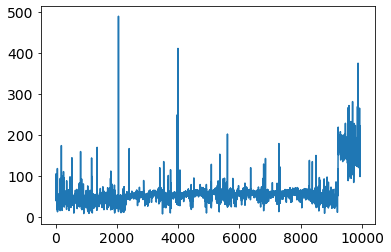

In [ ]:
pupil_vert_nor = (pupil_vert - np.mean(pupil_vert))/(np.std(pupil_vert)*np.sqrt(len(pupil_vert)))
pupil_hori_nor = (pupil_hori - np.mean(pupil_hori))/(np.std(pupil_hori)*np.sqrt(len(pupil_hori)))

#plt.plot(pupil_vert_nor)
plt.plot(pupil_hori)

In [ ]:
np.percentile(pupil_hori,10)

37.90393744102095

In [ ]:
# pupil horizontal correlates with vertical
pupil_corr = np.correlate(pupil_vert_nor,pupil_hori_nor,'full')

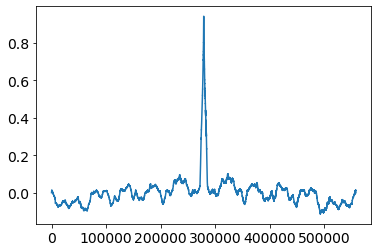

In [ ]:
plt.plot(pupil_corr)

In [ ]:
session.session_type

'brain_observatory_1.1'